Linear Regression

In [9]:
import pandas as pd

df = pd.read_csv("encoded_housing_data.csv")
df.head()


,price,area,status,bhk,bathroom,age,year,location_Alwarpet,location_Ambattur,location_Ambattur INDUSTRIAL ESTATE,...,builder_Swamaan Developers,builder_The Nest Builder,builder_Urban Tree Infrastructures,builder_VGK Builders Pvt Ltd,builder_VNR Homes,builder_Velan Housing Properties,builder_Vinay Asrani,builder_seller,builder_smartassetsindia,builder_viswaraj
0,37.49,872,1,2,2.0,1.0,2020.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,93.54,1346,0,3,2.0,0.0,2021.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,151.00,2225,0,3,2.0,0.0,2021.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,49.00,1028,1,2,2.0,3.0,2018.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,42.28,588,0,2,1.0,0.0,2021.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.columns


Index(['price', 'area', 'status', 'bhk', 'bathroom', 'age', 'year',
       'location_Alwarpet', 'location_Ambattur',
       'location_Ambattur INDUSTRIAL ESTATE',
       ...
       'builder_Swamaan Developers', 'builder_The Nest Builder',
       'builder_Urban Tree Infrastructures', 'builder_VGK Builders Pvt Ltd',
       'builder_VNR Homes', 'builder_Velan Housing Properties',
       'builder_Vinay Asrani', 'builder_seller', 'builder_smartassetsindia',
       'builder_viswaraj'],
      dtype='object', length=128)

In [11]:
X = df.drop("price", axis=1)
y = df["price"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.8568741636769107
MAE: 9.681857652636136


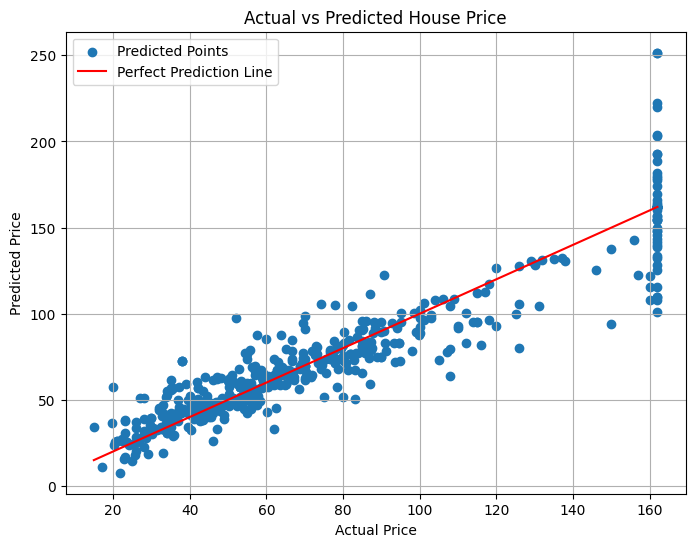

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, label="Predicted Points")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red',
         label="Perfect Prediction Line")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import joblib
joblib.dump(model, "house_price_model(LR).pkl")



['house_price_model.pkl']

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics")
print("-------------------------")
print("R² Score (Accuracy) :", r2)
print("Mean Absolute Error (MAE) :", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)


Model Performance Metrics
-------------------------
R² Score (Accuracy) : 0.8568741636769107
Mean Absolute Error (MAE) : 9.681857652636136
Mean Squared Error (MSE) : 236.45820634101867
Root Mean Squared Error (RMSE) : 15.377197610131004


In [19]:
accuracy_percent = r2 * 100
print("Model Accuracy (%):", accuracy_percent)


Model Accuracy (%): 85.68741636769107


try to print sample inputs 

In [21]:
X = df.drop("price", axis=1)
y = df["price"]

In [22]:
X = pd.get_dummies(X, drop_first=True)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
import joblib
joblib.dump(model, "house_price_model(LR).pkl")
joblib.dump(X.columns, "model_columns(LR).pkl")


['model_columns(LR).pkl']

In [ ]:
model_columns = joblib.load("model_columns(LR).pkl")
model_columns

Index(['area', 'status', 'bhk', 'bathroom', 'age', 'year', 'location_Alwarpet',
       'location_Ambattur', 'location_Ambattur INDUSTRIAL ESTATE',
       'location_Anna Nagar',
       ...
       'builder_Swamaan Developers', 'builder_The Nest Builder',
       'builder_Urban Tree Infrastructures', 'builder_VGK Builders Pvt Ltd',
       'builder_VNR Homes', 'builder_Velan Housing Properties',
       'builder_Vinay Asrani', 'builder_seller', 'builder_smartassetsindia',
       'builder_viswaraj'],
      dtype='object', length=127)

In [40]:
def predict_price(location, area, bhk, bathroom, age, year):
    input_df = pd.DataFrame(columns=model_columns)
    input_df.loc[0] = 0

    input_df["area"] = area
    input_df["bhk"] = bhk
    input_df["bathroom"] = bathroom
    input_df["age"] = age
    input_df["year"] = year
    input_df["status"] = 1

    loc_col = "location_" + location
    if loc_col in input_df.columns:
        input_df[loc_col] = 1

    price = model.predict(input_df)[0]
    if price < 1000:
        price = price * 100000   

    formatted_price = "₹ {:,}".format(int(price))
    print("Estimated House Price:", formatted_price)



In [41]:
predict_price("Anna Nagar", 1200, 3, 2, 2, 2023)


Estimated House Price: ₹ 14,897,173


In [42]:
accuracy_percent = r2 * 100
print("Model Accuracy (%):", accuracy_percent)


Model Accuracy (%): 85.68741636769107
